In [4]:
from dotenv import load_dotenv
import os

# .env 파일 로딩
load_dotenv()

# API 키 불러오기
API_KEY = os.getenv("API_KEY")

if not API_KEY:
    print("❌ API_KEY가 없습니다. .env 파일을 확인하세요.")
else:
    print("✅ API 키 불러오기 성공")


✅ API 키 불러오기 성공


In [5]:
import requests

def summarize_article(content, apikey):
    url = "https://tools.kinds.or.kr/api/v1/summary"  # ← 요거 수정해!
    headers = {"Content-Type": "application/json"}
    payload = {
        "content": content,
        "apikey": apikey
    }

    response = requests.post(url, headers=headers, json=payload)

    if response.status_code == 200:
        return response.json()
    else:
        print("❌ 오류 발생:", response.status_code)
        print(response.text)
        return None


In [6]:
import requests
import os
from dotenv import load_dotenv

# .env에서 API 키 불러오기
load_dotenv()
API_KEY = os.getenv("API_KEY")

def summarize_article(content, apikey):
    url = "https://tools.kinds.or.kr/api/v1/summary"
    headers = {"Content-Type": "application/json"}
    payload = {
        "content": content,
        "apikey": apikey
    }

    response = requests.post(url, headers=headers, json=payload)

    if response.status_code == 200:
        return response.json()
    else:
        print("❌ 오류 발생:", response.status_code)
        print(response.text)
        return None

# 테스트용 기사 본문
article_text = """
인공지능 일반 지능(AGI)은 인간의 인지 능력과 맞먹거나 이를 능가하는 형태의 AI로, 특정 작업에 국한된 좁은 AI와는 구별된다...
"""

result = summarize_article(article_text, API_KEY)

if result:
    print("✅ 요약 결과:\n")
    print(result["summary"])
    print("\n🧮 사용된 토큰 수:", result["token_count"])
else:
    print("😵 요약 실패. 다시 확인하자.")


✅ 요약 결과:



KeyError: 'summary'

In [8]:
result = summarize_article(article_text, API_KEY)

if result:
    print("✅ API 응답 원본:\n")
    print(result)  # 먼저 전체 응답 확인

    if "summary" in result:
        print("\n🧠 요약 결과:\n")
        print(result["summary"])
        print("\n🧮 사용된 토큰 수:", result.get("token_count", "알 수 없음"))
    else:
        print("😵 'summary' 키가 없습니다. 응답 내용을 확인해보세요.")
else:
    print("😵 요약 실패. 다시 확인하자.")


✅ API 응답 원본:

{'request_id': '', 'result': -1, 'reason': 'Blank Access Key!:'}
😵 'summary' 키가 없습니다. 응답 내용을 확인해보세요.


In [9]:
print("🔑 API_KEY 값:", repr(API_KEY))


🔑 API_KEY 값: '254bec69-1c13-470f-904a-c4bc9e46cc80'


In [10]:
from dotenv import load_dotenv
import os

load_dotenv()
API_KEY = os.getenv("API_KEY")

print("🔑 API_KEY 값:", repr(API_KEY))  # <-- 이걸로 실체 확인

if not API_KEY:
    print("❌ API 키가 없습니다. .env 파일 확인하세요.")
else:
    print("✅ API 키 불러오기 성공")


🔑 API_KEY 값: '254bec69-1c13-470f-904a-c4bc9e46cc80'
✅ API 키 불러오기 성공


In [11]:
print("🔎 API_KEY 정밀검사:", repr(API_KEY))


🔎 API_KEY 정밀검사: '254bec69-1c13-470f-904a-c4bc9e46cc80'


In [13]:
# 가짜 기사 원문 (네가 요약하고 싶은 텍스트)
content = """
인공지능 일반 지능(AGI)은 인간의 인지 능력과 맞먹거나 이를 능가하는 형태의 AI로, 특정 작업에 국한된 좁은 AI와는 구별된다.
"""

# API 키 (이미 불러온 값 사용)
apikey = API_KEY

# 실제로 전송될 payload 구조 확인
payload = {
    "content": content,
    "apikey": apikey
}

# 이걸로 출력해서 실제 값 확인
print("📦 payload 실제 내용:")
print(payload)


📦 payload 실제 내용:
{'content': '\n인공지능 일반 지능(AGI)은 인간의 인지 능력과 맞먹거나 이를 능가하는 형태의 AI로, 특정 작업에 국한된 좁은 AI와는 구별된다.\n', 'apikey': '254bec69-1c13-470f-904a-c4bc9e46cc80'}


In [17]:
import json

result = summarize_article(article_text, API_KEY)

if result:
    print("📦 실제 API 응답:\n")
    print(json.dumps(result, indent=2, ensure_ascii=False))  # 이걸로 진실을 보자

    if "summary" in result:
        print("\n✅ 요약 결과:\n")
        print(result["summary"])
    else:
        print("\n⚠️ 요약 실패: summary 키 없음. 이유 확인 필요")
else:
    print("❌ API 요청 자체 실패")


📦 실제 API 응답:

{
  "request_id": "",
  "result": -1,
  "reason": "Blank Access Key!:"
}

⚠️ 요약 실패: summary 키 없음. 이유 확인 필요


In [18]:
print("📛 API_KEY 확인:", repr(API_KEY))

payload = {
    "content": "이건 요약 테스트 텍스트야.",
    "apikey": API_KEY
}

print("📦 payload 확인:", payload)
print("🧪 apikey 값만:", repr(payload["apikey"]))


📛 API_KEY 확인: '254bec69-1c13-470f-904a-c4bc9e46cc80'
📦 payload 확인: {'content': '이건 요약 테스트 텍스트야.', 'apikey': '254bec69-1c13-470f-904a-c4bc9e46cc80'}
🧪 apikey 값만: '254bec69-1c13-470f-904a-c4bc9e46cc80'


In [19]:
from dotenv import load_dotenv
import os

load_dotenv()
raw_key = os.getenv("API_KEY")
API_KEY = raw_key.strip() if raw_key else None

print("🧽 정리된 API_KEY:", repr(API_KEY))


🧽 정리된 API_KEY: '254bec69-1c13-470f-904a-c4bc9e46cc80'


In [20]:
import requests
import os
from dotenv import load_dotenv

# 환경 변수 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 요청 URL
url = "https://tools.kinds.or.kr/search/news"

# 간단한 요청 바디 (키워드만 넣음)
payload = {
    "access_key": API_KEY,
    "argument": {
        "query": "인공지능",
        "published_at": {
            "from": "2024-01-01",
            "until": "2024-01-02"
        },
        "provider": [],
        "category": [],
        "category_incident": [],
        "provider_subject": [],
        "subject_info": [],
        "sort": {
            "date": "desc"
        },
        "return_from": 0,
        "return_size": 1,
        "fields": ["title", "content"]
    }
}

# 요청 전송
response = requests.post(url, json=payload)

# 결과 확인
if response.status_code == 200:
    print("✅ API 통신 성공")
    result = response.json()
    print("📄 뉴스 제목 예시:", result["return_object"]["documents"][0]["title"])
else:
    print("❌ 오류 발생:", response.status_code)
    print(response.text)


✅ API 통신 성공
📄 뉴스 제목 예시: [만파식적] 6G와 ‘4류 정치’


In [21]:
# 결과 확인
if response.status_code == 200:
    print("✅ API 통신 성공")
    result = response.json()
    
    documents = result["return_object"]["documents"]
    print(f"📄 총 {len(documents)}개의 뉴스 제목 출력:\n")
    
    for i, doc in enumerate(documents, 1):
        print(f"{i}. {doc['title']}")
else:
    print("❌ 오류 발생:", response.status_code)
    print(response.text)


✅ API 통신 성공
📄 총 1개의 뉴스 제목 출력:

1. [만파식적] 6G와 ‘4류 정치’


In [23]:
result

{'result': 0,
 'return_object': {'total_hits': 24,
  'documents': [{'news_id': '02100311.20240101175815001',
    'title': '[만파식적] 6G와 ‘4류 정치’',
    'content': '주요국들이 ‘꿈의 통신’이라고 불리는 6세대(6G) 이동통신 기술 선점을 위해 총성 없는 전쟁을 벌이고 있다. 6G는 초당 100기가비트(Gb) 이상 최고 1테라비트(1Tb는 1000Gb) 전송속도로 최고 20Gb인 5G보다 50배 이상 전송 속도가 빠른 차세대 통신 기술이다. 자율주행차, 만물인터넷(IoE), 인공지능(AI), 확장현실(XR) 등을 구현하는 핵심 통신 기술 인프라다. 미국·유럽·일본·중국 등 주요국에서는 정보기술(IT) 기업들이 6G 구현을 위한 연구개발(R&amp;D)에 막대한 돈을 투자하고 있으며 정부도 지원을 아끼지 않고 있다. \n \n\n 2019년 세계 최초 5G 서비스 상용화라는 금자탑을 세운 우리 기업들도 발 빠르게 움직이고 있다. 5G 최초 상용화라는 타이틀을 얻었음에도 정작 5G 장비 시장에서 중국에 밀린 뼈아픈 경험을 되풀이하지 않기 위해서다. 삼성전자는 2019년부터 삼성리서치 차세대 통신연구센터에서 6G 선행 기술 연구를 시작했으며 2022년 5월에는 세계 최초로 ‘6G 주파스 백서’를 발간했다. LG 전자는 지난해 6G 테라헤르츠(㎔) 대역 무선 데이터 전송 테스트에서 도심 지역으로는 세계 최장 거리 수준인 실외 500m 데이터 송수신에 성공했다. SK텔레콤·KT·LG유플러스 등 통신3사도 6G 연구에 매진하고 있다. 2028년 6G 상용화를 목표로 제시한 우리 정부는 향후 5년 동안 4407억 원을 R&amp;D에 투자할 계획이다. \n \n\n 우리 기업들이 ‘혁신’에 전력투구를 하는 동안 우리 정치권은 퇴행적 권력 다툼에 여념이 없다. 거대 야당인 더불어민주당은 ‘이재명 사당, 개딸당’으로 변질됐고 여당인 국민의힘은 ‘용산의 여의도

# query 범위 확장

In [31]:
import requests
import os
from dotenv import load_dotenv

# 환경 변수 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 요청 URL
url = "https://tools.kinds.or.kr/search/news"

# 간단한 요청 바디 (키워드만 넣음)
payload = {
    "access_key": API_KEY,
    "argument": {
        "query": "인공지능",
        "published_at": {
            "from": "2025-01-01",
            "until": "2025-02-02"
        },
        "provider": [],
        "category": [],
        "category_incident": [],
        "provider_subject": [],
        "subject_info": [],
        "sort": {
            "date": "desc"
        },
        "return_from": 0,
        "return_size": 10,
        "fields": ["title", "content"]
    }
}

# 요청 전송
response = requests.post(url, json=payload)

# 결과 확인
if response.status_code == 200:
    print("✅ API 통신 성공")
    result = response.json()
    documents = result["return_object"]["documents"]
    
    print(f"📄 총 {len(documents)}개 기사 중 최대 5개 출력:\n")
    for i, doc in enumerate(documents[:5], 1):
        print(f"{i}. 제목: {doc['title']}")
else:
    print("❌ 오류 발생:", response.status_code)
    print(response.text)


✅ API 통신 성공
📄 총 10개 기사 중 최대 5개 출력:

1. 제목: 딥시크 "천안문 사태는 中흑역사"…대만 천재해커 '검열' 뚫었다
2. 제목: 이재명 "AI 예산 담은 추경 적극 협조…정부 제안 기다리겠다"
3. 제목: 국힘 "이재명, AI 진심이라면 반도체 특별법부터 협조하라"
4. 제목: '中 딥시크' 보란듯…오픈AI, 추론 모델 'o3 미니' 무료 배포
5. 제목: 삼성전자, HBM3E '개선제품' 내놓는다…"경영 어려움 단시간 해결" [biz-플러스]


# 요청 쿼리 확장

In [32]:
import requests
import os
from dotenv import load_dotenv

# 환경 변수 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")
url = "https://tools.kinds.or.kr/search/news"

# 분석할 언론사 리스트
providers = ["조선일보", "중앙일보", "한겨레", "서울경제", "매일경제", "동아일보"]

# 결과 저장용
ai_article_counts = {}

# 반복해서 각 언론사별 기사 수 확인
for provider in providers:
    payload = {
        "access_key": API_KEY,
        "argument": {
            "query": "인공지능 OR AI",
            "published_at": {
                "from": "2025-01-01",
                "until": "2025-01-31"
            },
            
            "provider": [provider],
            "category": [],
            "category_incident": [],
            "provider_subject": [],
            "subject_info": [],
            "return_from": 0,
            "return_size": 1,
            "fields": ["title"]
        }
    }

    response = requests.post(url, json=payload)
    if response.status_code == 200:
        result = response.json()
        count = result["return_object"].get("total_hits", 0)
        ai_article_counts[provider] = count
    else:
        ai_article_counts[provider] = "❌ 에러"

# 결과 출력
print("\n📊 AI 관련 기사 수 (2024년 기준)\n")
for provider, count in ai_article_counts.items():
    print(f"{provider}: {count}건")



📊 AI 관련 기사 수 (2024년 기준)

조선일보: 0건
중앙일보: 0건
한겨레: 0건
서울경제: 1341건
매일경제: 0건
동아일보: 0건


In [34]:
from datetime import datetime, timedelta
import requests
import os
from dotenv import load_dotenv
import pandas as pd

# 환경 변수 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 키워드
query = "인공지능 OR AI OR 챗GPT OR 딥러닝"

# 날짜 설정 (일주일 단위로 쪼갬)
start_date = datetime.strptime("2024-01-01", "%Y-%m-%d")
end_date = datetime.strptime("2024-12-31", "%Y-%m-%d")
chunk_size = 7  # 7일씩 묶기

# 결과 저장
data = []

current = start_date
while current <= end_date:
    from_str = current.strftime("%Y-%m-%d")
    until_date = current + timedelta(days=chunk_size - 1)
    if until_date > end_date:
        until_date = end_date
    until_str = until_date.strftime("%Y-%m-%d")

    payload = {
        "access_key": API_KEY,
        "argument": {
            "query": query,
            "published_at": {
                "from": from_str,
                "until": until_str
            },
            "provider": ["서울경제"],
            "category": [],
            "category_incident": [],
            "provider_subject": [],
            "subject_info": [],
            "return_from": 0,
            "return_size": 1,
            "fields": ["title"]
        }
    }

    response = requests.post("https://tools.kinds.or.kr/search/news", json=payload)
    if response.status_code == 200:
        result = response.json()
        hits = result["return_object"].get("total_hits", 0)
        print(f"{from_str} ~ {until_str}: {hits}건")
        data.append({
            "기간": f"{from_str} ~ {until_str}",
            "기사 수": hits
        })
    else:
        print(f"{from_str} ~ {until_str}: 요청 실패")
        data.append({
            "기간": f"{from_str} ~ {until_str}",
            "기사 수": "에러"
        })

    current += timedelta(days=chunk_size)

# DataFrame 변환 및 확인
df = pd.DataFrame(data)
print("\n📊 주간별 AI 기사 수 요약:")
print(df.head())

# CSV 저장 (선택)
df.to_csv("서울경제_AI_기사_주간_통계.csv", index=False)


2024-01-01 ~ 2024-01-07: 197건
2024-01-08 ~ 2024-01-14: 316건
2024-01-15 ~ 2024-01-21: 231건
2024-01-22 ~ 2024-01-28: 217건
2024-01-29 ~ 2024-02-04: 240건
2024-02-05 ~ 2024-02-11: 207건
2024-02-12 ~ 2024-02-18: 234건
2024-02-19 ~ 2024-02-25: 264건
2024-02-26 ~ 2024-03-03: 267건
2024-03-04 ~ 2024-03-10: 305건
2024-03-11 ~ 2024-03-17: 260건
2024-03-18 ~ 2024-03-24: 250건
2024-03-25 ~ 2024-03-31: 250건
2024-04-01 ~ 2024-04-07: 267건
2024-04-08 ~ 2024-04-14: 243건
2024-04-15 ~ 2024-04-21: 254건
2024-04-22 ~ 2024-04-28: 255건
2024-04-29 ~ 2024-05-05: 234건
2024-05-06 ~ 2024-05-12: 283건
2024-05-13 ~ 2024-05-19: 193건
2024-05-20 ~ 2024-05-26: 260건
2024-05-27 ~ 2024-06-02: 374건
2024-06-03 ~ 2024-06-09: 228건
2024-06-10 ~ 2024-06-16: 258건
2024-06-17 ~ 2024-06-23: 264건
2024-06-24 ~ 2024-06-30: 281건
2024-07-01 ~ 2024-07-07: 281건
2024-07-08 ~ 2024-07-14: 270건
2024-07-15 ~ 2024-07-21: 244건
2024-07-22 ~ 2024-07-28: 242건
2024-07-29 ~ 2024-08-04: 234건
2024-08-05 ~ 2024-08-11: 250건
2024-08-12 ~ 2024-08-18: 228건
2024-08-19

In [ ]:
import requests
import os
from dotenv import load_dotenv

# 1. 환경 변수에서 API 키 불러오기
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 2. 검색 대상 키워드 & 기간 설정
query = "인공지능 OR AI"
from_date = "2025-04-01"
until_date = "2025-04-15"

# 3. API 요청 URL
url = "https://tools.kinds.or.kr/search/news"

# 4. 요청 바디 구성
payload = {
    "access_key": API_KEY,
    "argument": {
        "query": query,
        "published_at": {
            "from": from_date,
            "until": until_date
        },
        "provider": ["서울경제"],  # 
        "category": [],
        "category_incident": [],
        "provider_subject": [],
        "subject_info": [],
        "sort": { "date": "desc" },
        "return_from": 0,
        "return_size": 10000,
        "fields": ["title", "published_at"]
    }
}

# 5. 요청 보내고 결과 확인
response = requests.post(url, json=payload)

if response.status_code == 200:
    print("✅ API 호출 성공!")
    result = response.json()
    documents = result["return_object"]["documents"]

    for i, doc in enumerate(documents, 1):
        print(f"\n{i}. 📰 {doc['title']}")
        print(f"   📅 {doc['published_at']}")
else:
    print("❌ 오류 발생:", response.status_code)
    print(response.text)


✅ API 호출 성공!

1. 📰 "지금 비트코인 사야할때"…역대급 경제 대공황 경고한 '부자아빠' 기요사키
   📅 2025-04-14T00:00:00.000+09:00

2. 📰 서울시, AI로 청년취업 사다리 놓는다
   📅 2025-04-14T00:00:00.000+09:00

3. 📰 [이희옥 칼럼] 美, 중국의 수를 잘못 읽었다
   📅 2025-04-14T00:00:00.000+09:00

4. 📰 조태열 장관 "韓 기업 안정적 대미 투자 여건을"
   📅 2025-04-14T00:00:00.000+09:00

5. 📰 '비전프로' 쓴맛 본 애플, 스마트 글라스에 ‘올인'하나
   📅 2025-04-14T00:00:00.000+09:00

6. 📰 “걸음걸이로 질병 진단” AI 보행분석, 뭐길래
   📅 2025-04-14T00:00:00.000+09:00

7. 📰 김동원 고려대 총장 "AI·학술에 6200억 투자…세계 30위권 대학될 것"
   📅 2025-04-14T00:00:00.000+09:00

8. 📰 [기자의눈] AI 정부 막는 예타 보수주의
   📅 2025-04-14T00:00:00.000+09:00

9. 📰 '관세 지원' 선봉에 선 수은 …정부, 추경서 증자 추진
   📅 2025-04-14T00:00:00.000+09:00

10. 📰 리가켐 등 新항암기술 발표…글로벌 빅파마와 협업 모색
   📅 2025-04-14T00:00:00.000+09:00

11. 📰 김건 의원 "트럼프 시대, 한국형 ODA 전략에 기회될 것
   📅 2025-04-14T00:00:00.000+09:00

12. 📰 안철수 "李 AI공약은 K엔비디아 시즌2…모르면 좀 가만히 있어라"
   📅 2025-04-14T00:00:00.000+09:00

13. 📰 中, 희토류 수출 전격 중단…트럼프 관세에 ‘정밀 반격’
   📅 2025-04-14T00:00:00.000+09:00

14. 📰 "전 국민 무료 '한국형 챗GPT' 사용…'AI 기본사회' 만

# 빅카인 api 전체 항목 코드 구현

# 2. 뉴스 검색 api

In [39]:
import requests
import os
from dotenv import load_dotenv
from pprint import pprint

# 1. 환경 변수 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 2. 요청 URL
url = "https://tools.kinds.or.kr/search/news"

# 3. 다양한 테스트 케이스 입력
search_conditions = {
    "query": "인공지능 OR AI OR 챗GPT",   # 🔍 키워드 실험 가능
    "from": "2025-04-01",                  # 🗓️ 기간 조절 가능
    "until": "2025-04-15",
    "provider": ["서울경제"],              # 📰 너희 회사로 제한 (기타 안됨)
    "category": [],                        # 예: ["IT_과학"], ["경제"]
    "fields": ["title", "published_at", "content", "provider", "byline"]  # 어떤 데이터 받고 싶은지
}

# 4. 요청 payload 구성
payload = {
    "access_key": API_KEY,
    "argument": {
        "query": search_conditions["query"],
        "published_at": {
            "from": search_conditions["from"],
            "until": search_conditions["until"]
        },
        "provider": search_conditions["provider"],
        "category": search_conditions["category"],
        "category_incident": [],
        "provider_subject": [],
        "subject_info": [],
        "sort": {"date": "desc"},
        "return_from": 0,
        "return_size": 5,
        "fields": search_conditions["fields"]
    }
}

# 5. 요청 보내기
response = requests.post(url, json=payload)

# 6. 결과 출력
if response.status_code == 200:
    print("✅ 뉴스 검색 API 호출 성공!")
    result = response.json()
    documents = result["return_object"]["documents"]
    total_hits = result["return_object"]["total_hits"]

    print(f"\n📊 총 검색 결과: {total_hits}건\n")

    for i, doc in enumerate(documents, 1):
        print(f"----- {i} -----")
        for field in search_conditions["fields"]:
            print(f"{field}: {doc.get(field, '[없음]')}")
        print()
else:
    print("❌ 오류 발생:", response.status_code)
    print(response.text)


✅ 뉴스 검색 API 호출 성공!

📊 총 검색 결과: 691건

----- 1 -----
title: "지금 비트코인 사야할때"…역대급 경제 대공황 경고한 '부자아빠' 기요사키
published_at: 2025-04-14T00:00:00.000+09:00
content: 세계적인 베스트셀러 '부자 아빠 가난한 아빠'의 저자 로버트 기요사키가 역사상 최악의 시장 붕괴를 경고했다. 
 

 13일(현지시간) 야후 파이낸스에 따르면 기요사키는 주식, 채권, 달러 가치가 모두 무너질 것으로 예상하며 "금, 은, 비트코인 투자를 통해 포트폴리오를 보호해야 한다"고 강조했다. 
 

 이날 로버트 기요사키는 미국 연방준비제도(Fed·연준), 유럽중앙은행(ECB), 영국중앙은행, 일본은행 등을 글로벌 범죄 집단에 비유하며 "중앙은행이라는 사악한 세계 금융 카르텔이 투자자들의 자산을 강탈하고 있다"고 밝혔다. 이어 "정직하지 못하고 부패한 미국 달러 가치가 몰락하고 있다"면서 "주식, 채권, ETF 등을 보유한 투자자들도 결국 무너지게 될 것"이라고 경고했다. 
 

 기요사키는 최근 수년 간 꾸준히 증시 붕괴 가능성을 언급해왔다. 지난해에도 미국의 부채 문제를 거론하며 "주식, 채권, 부동산 같은 거품 자산이 무너질 것"이라고 경고했다. 그러나 지난해 미국 증시는 AI(인공지능) 열풍과 연방준비제도의 금리 인하 기대감 속에서 역사적인 상승률을 기록했다. 이로 인해 기요사키의 경고가 지나치게 비관적이라는 평가도 일각에서 제기된다. 
 

 13일(현지시간) 가상화폐 거래소 코인베이스에 따르면 미 동부 시간 이날 오후 7시 30분(서부 오후 4시 30분) 비트코인 1개당 가격은 24시간 전보다 1.98% 내린 8만 3504달러(1억1917만원)에 거래됐다. 전날 비트코인은 트럼프 행정부가 반도체와 스마트폰 등 전자 제품을 상호관세 제외 품목에 포함하면서 8만5000 달러선을 넘기도 했다. 이는 지난 9일 국가별 상호관세를 90일 유예한 데 이어 반도체를 면제하는 등 그동안 

# 3. 뉴스 조회 api

In [42]:
docs = result["return_object"]["documents"]

for i, doc in enumerate(docs[:5], 1):
    print(f"{i}. 뉴스 ID:", doc["news_id"])


1. 뉴스 ID: 02100311.20250414223657001
2. 뉴스 ID: 02100311.20250414203036001
3. 뉴스 ID: 02100311.20250414200858001
4. 뉴스 ID: 02100311.20250414192355001
5. 뉴스 ID: 02100311.20250414191029001


In [44]:
import requests
import os
from dotenv import load_dotenv

# 1. API 키 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 2. 검색 파라미터 정의
query = "인공지능 OR AI"
from_date = "2025-04-01"
until_date = "2025-04-15"
provider = ["서울경제"]
preview_length = 200  # 기사 본문 미리보기 길이

# 3. 뉴스 검색 API 요청
search_url = "https://tools.kinds.or.kr/search/news"

search_payload = {
    "access_key": API_KEY,
    "argument": {
        "query": query,
        "published_at": {
            "from": from_date,
            "until": until_date
        },
        "provider": provider,
        "category": [],
        "category_incident": [],
        "provider_subject": [],
        "subject_info": [],
        "sort": { "date": "desc" },
        "return_from": 0,
        "return_size": 5,
        "fields": ["news_id", "title", "published_at"]
    }
}

search_response = requests.post(search_url, json=search_payload)

if search_response.status_code == 200:
    search_result = search_response.json()
    docs = search_result["return_object"]["documents"]
    total_hits = search_result["return_object"]["total_hits"]

    if not docs:
        print("❗ 뉴스 검색 결과가 없습니다.")
    else:
        print("✅ 뉴스 검색 API 호출 성공!")
        print(f"📦 총 검색 결과: {total_hits}건\n")

        # 뉴스 ID 추출
        news_ids = [doc["news_id"] for doc in docs]
        for i, doc in enumerate(docs, 1):
            print(f"{i}. 뉴스 ID: {doc['news_id']} | 제목: {doc['title']}")
        
        print("\n📥 뉴스 ID로 상세 기사 조회 시작...\n")

        # 4. 뉴스 조회 API 요청
        view_payload = {
            "access_key": API_KEY,
            "argument": {
                "news_ids": news_ids,
                "fields": [
                    "title",
                    "content",
                    "byline",
                    "category",
                    "published_at",
                    "provider",
                    "images",
                    "images_caption"
                ]
            }
        }

        view_response = requests.post(search_url, json=view_payload)

        if view_response.status_code == 200:
            view_result = view_response.json()
            print("✅ 뉴스 조회 API 호출 성공!\n")

            for i, doc in enumerate(view_result["return_object"]["documents"], 1):
                print(f"----- {i}번째 뉴스 -----")
                print("제목:", doc.get("title", "없음"))
                print("기자:", doc.get("byline", "없음"))
                print("발행일:", doc.get("published_at", "없음"))
                print("카테고리:", doc.get("category", []))
                print("언론사:", doc.get("provider", "없음"))
                print("본문 (앞부분):", doc.get("content", "")[:preview_length], "...")

                # 이미지 있을 경우만 출력
                image_url = doc.get("images")
                if image_url:
                    print("🖼 이미지 URL:", image_url)
                    print("📝 이미지 설명:", doc.get("images_caption", "설명 없음"))
                print()

        else:
            print("❌ 뉴스 조회 API 오류:", view_response.status_code)
            try:
                print(view_response.json().get("reason", "알 수 없는 오류"))
            except:
                print(view_response.text)

else:
    print("❌ 뉴스 검색 API 오류:", search_response.status_code)
    try:
        print(search_response.json().get("reason", "알 수 없는 오류"))
    except:
        print(search_response.text)


✅ 뉴스 검색 API 호출 성공!
📦 총 검색 결과: 691건

1. 뉴스 ID: 02100311.20250414223657001 | 제목: "지금 비트코인 사야할때"…역대급 경제 대공황 경고한 '부자아빠' 기요사키
2. 뉴스 ID: 02100311.20250414203036001 | 제목: 서울시, AI로 청년취업 사다리 놓는다
3. 뉴스 ID: 02100311.20250414200858001 | 제목: [이희옥 칼럼] 美, 중국의 수를 잘못 읽었다
4. 뉴스 ID: 02100311.20250414192355001 | 제목: 조태열 장관 "韓 기업 안정적 대미 투자 여건을"
5. 뉴스 ID: 02100311.20250414191029001 | 제목: '비전프로' 쓴맛 본 애플, 스마트 글라스에 ‘올인'하나

📥 뉴스 ID로 상세 기사 조회 시작...

✅ 뉴스 조회 API 호출 성공!

----- 1번째 뉴스 -----
제목: 조태열 장관 "韓 기업 안정적 대미 투자 여건을"
기자: 유주희 기자
발행일: 2025-04-14T00:00:00.000+09:00
카테고리: ['정치>외교', '국제>미국_북미']
언론사: 서울경제
본문 (앞부분): 조태열 외교부 장관이 방한 중인 미국 하원 코리아스터디그룹(CSGK) 대표단과 14일 만나 한미동맹 및 경제협력, 러북 군사협력 문제를 포함한 지역정세 등에 관해 의견을 교환했다. 
 

 CSGK는 미 의회 내 구성된 한국 관련 초당적 연구 모임으로, 2018년 2월 공식 출범해 현재 약 70명이 참여 중이다. 이번에 방한한 CSGK 소속 의원은 아미 베 ...
🖼 이미지 URL: /02100311/2025/04/14/02100311.20250414192355001.01.jpg
📝 이미지 설명: 조태열(오른쪽에서 세번째) 외교부 장관과 미국 하원 코리아스터디그룹(CSGK) 대표단. 사진제공=외교부

----- 2번째 뉴스 -----
제목: 서울시, AI로 청년취업 사다리 놓는다
기자: 양철민 기자
발행일: 2025-04

# 4. 오늘의 이슈 api(이슈 랭킹 api)

In [46]:
import requests
import os
from dotenv import load_dotenv

# 1. 환경 변수에서 API 키 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 2. 날짜 & 언론사 설정
url = "https://tools.kinds.or.kr/issue_ranking"
target_date = "2025-04-14"
provider = ["서울경제"]  # 생략 가능

# 3. 요청 바디 구성
payload = {
    "access_key": API_KEY,
    "argument": {
        "date": target_date,
        "provider": provider
    }
}

# 4. API 호출
response = requests.post(url, json=payload)

# 5. 결과 처리
if response.status_code == 200:
    result = response.json()
    topics = result["return_object"].get("topics", [])

    print(f"\n✅ 이슈 랭킹 API 호출 성공! ({target_date})\n")

    if not topics:
        print("📭 이 날은 이슈가 없어요. 조용한 날인가봐요.")
    else:
        # topic_rank 기준으로 오름차순 정렬 (중요도 높은 순)
        topics = sorted(topics, key=lambda x: x["topic_rank"])

        for i, topic in enumerate(topics, 1):
            print(f"🧠 {i}. 이슈 제목: {topic['topic']}")
            print(f"   🔗 주요 키워드: {topic['topic_keyword']}")
            print(f"   🔢 중요도 (topic_rank): {topic['topic_rank']}")
            print(f"   📰 관련 기사 수: {len(topic['news_cluster'])}")
            
            # 뉴스 ID 리스트 (선택 출력)
            print("   🆔 뉴스 ID:")
            for news_id in topic["news_cluster"]:
                print(f"     - {news_id}")
            print("-" * 80)

else:
    print("❌ 이슈 랭킹 API 오류 발생:", response.status_code)
    try:
        print("사유:", response.json().get("reason", "알 수 없는 오류"))
    except:
        print(response.text)



✅ 이슈 랭킹 API 호출 성공! (2025-04-14)

🧠 1. 이슈 제목: 개그우먼 박나래 자택 도난 사건 피의자 체포
   🔗 주요 키워드: 박나래,도난,자택,내부,소행,사건,체포,피의자,55억,용의자,범인,내부소행,도둑,절도,절도범,지인,구속,공식,억집,도난사건,전과,내부자,55억집,소속사,발부,박나래측,영장,검거,전과자,조치,의혹,법적,도난범,여부,침입,여죄,루머,실체,진범,조사,장도연,전말,금품,사실,구속영장,다수,진심,당부,언론,가능성
   🔢 중요도 (topic_rank): 52
   📰 관련 기사 수: 2
   🆔 뉴스 ID:
     - 02100311.20250414120618001
     - 02100311.20250414120258001
--------------------------------------------------------------------------------
🧠 2. 이슈 제목: 경찰, 쯔양으로부터 고소당한 김세의 씨 불송치 결정 후 검찰 보완 수사 요구
   🔗 주요 키워드: 수사,보완,쯔양,경찰,불송치,김세의,김세,검찰,요구,보완수사,훼손,협박,명예훼손,가세연,가세,혐의,결정,무혐의,지휘,대표,고소,각하,부실,논란,재접수,공개,주작감별사,법률대리,상황,반복,피소,전문가,사과,고소인,제작,판단,폭력,3개월,조정,고소취하서,의미,14일,누설,이날,구속,강남경찰서,표명,언론,불안감,규정
   🔢 중요도 (topic_rank): 53
   📰 관련 기사 수: 3
   🆔 뉴스 ID:
     - 02100311.20250414164911001
     - 02100311.20250414133232001
     - 02100311.20250414120301001
--------------------------------------------------------------------------------
🧠 3. 이슈 제목: 신안산선 지하터널 공사 현장 붕괴 사고, 실종자 수색 지속 중
   🔗 주요 키워드: 붕괴

# 5. 연관어 분석 api(워드 클라우드)

In [47]:
import requests
import os
from dotenv import load_dotenv

# 1. API 키 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 2. 요청 설정
url = "https://tools.kinds.or.kr/word_cloud"

# 분석 기준 키워드와 기간
query_keyword = "인공지능"
from_date = "2025-04-01"
until_date = "2025-04-14"
provider = ["서울경제"]
category = ["IT_과학"]

# 3. 요청 바디 구성
payload = {
    "access_key": API_KEY,
    "argument": {
        "query": query_keyword,
        "published_at": {
            "from": from_date,
            "until": until_date
        },
        "provider": provider,
        "category": category,
        "category_incident": [],
        "byline": "",
        "provider_subject": []
    }
}

# 4. API 호출
response = requests.post(url, json=payload)

# 5. 결과 처리
if response.status_code == 200:
    result = response.json()
    nodes = result["return_object"].get("nodes", [])

    print(f"✅ 연관어 분석 API 호출 성공! (기준 키워드: '{query_keyword}')\n")

    if not nodes:
        print("📭 연관 키워드가 없습니다.")
    else:
        print("📌 연관 키워드 목록 (중요도 순):\n")
        # 중요도 기준 내림차순 정렬
        nodes = sorted(nodes, key=lambda x: x["weight"], reverse=True)

        for i, node in enumerate(nodes, 1):
            print(f"{i}. 🔑 키워드: {node['name']:<15} 중요도(weight): {node['weight']:.3f}")
else:
    print("❌ 연관어 분석 API 오류 발생:", response.status_code)
    try:
        print("사유:", response.json().get("reason", "알 수 없는 오류"))
    except:
        print(response.text)


✅ 연관어 분석 API 호출 성공! (기준 키워드: '인공지능')

📌 연관 키워드 목록 (중요도 순):

1. 🔑 키워드: AI              중요도(weight): 139.130
2. 🔑 키워드: 삼성전자            중요도(weight): 6.670
3. 🔑 키워드: LG전자            중요도(weight): 5.190
4. 🔑 키워드: 오픈AI            중요도(weight): 5.040
5. 🔑 키워드: 데이터센터           중요도(weight): 4.870
6. 🔑 키워드: CEO             중요도(weight): 4.200
7. 🔑 키워드: 반도체             중요도(weight): 4.200
8. 🔑 키워드: 챗GPT            중요도(weight): 4.200
9. 🔑 키워드: GPU             중요도(weight): 4.000
10. 🔑 키워드: 중국              중요도(weight): 4.000
11. 🔑 키워드: 마이크로소프트         중요도(weight): 3.330
12. 🔑 키워드: MS              중요도(weight): 3.110
13. 🔑 키워드: SK              중요도(weight): 2.860
14. 🔑 키워드: SK텔레콤           중요도(weight): 2.670
15. 🔑 키워드: 그래픽처리장치         중요도(weight): 2.670
16. 🔑 키워드: 보고서             중요도(weight): 2.670
17. 🔑 키워드: AGI             중요도(weight): 2.670
18. 🔑 키워드: IoT             중요도(weight): 2.670
19. 🔑 키워드: 사물인터넷           중요도(weight): 2.670
20. 🔑 키워드: 롯데마트            중요도(weight): 2.310
21. 🔑 키워드: KT              

# 6. 키워드 트렌드 api(뉴스 타임라인)

In [52]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. 맥북 기본 한글 폰트 지정 (AppleGothic 또는 NanumGothic)
plt.rcParams['font.family'] = 'AppleGothic'

# 2. 마이너한 깨짐 방지 (음수 표시 에러 방지)
plt.rcParams['axes.unicode_minus'] = False



✅ 키워드 트렌드 API 호출 성공! (키워드: '인공지능')

📊 날짜별 키워드 언급량:

20250301 → 25건
20250302 → 22건
20250303 → 42건
20250304 → 53건
20250305 → 58건
20250306 → 53건
20250307 → 43건
20250308 → 13건
20250309 → 27건
20250310 → 41건
20250311 → 42건
20250312 → 57건
20250313 → 47건
20250314 → 37건
20250315 → 9건
20250316 → 17건
20250317 → 40건
20250318 → 37건
20250319 → 69건
20250320 → 54건
20250321 → 26건
20250322 → 11건
20250323 → 27건
20250324 → 40건
20250325 → 52건
20250326 → 61건
20250327 → 56건
20250328 → 36건
20250329 → 5건
20250330 → 23건
20250331 → 36건
20250401 → 45건
20250402 → 51건
20250403 → 42건
20250404 → 30건
20250405 → 3건
20250406 → 20건
20250407 → 33건
20250408 → 55건
20250409 → 45건
20250410 → 40건
20250411 → 24건
20250412 → 6건
20250413 → 32건


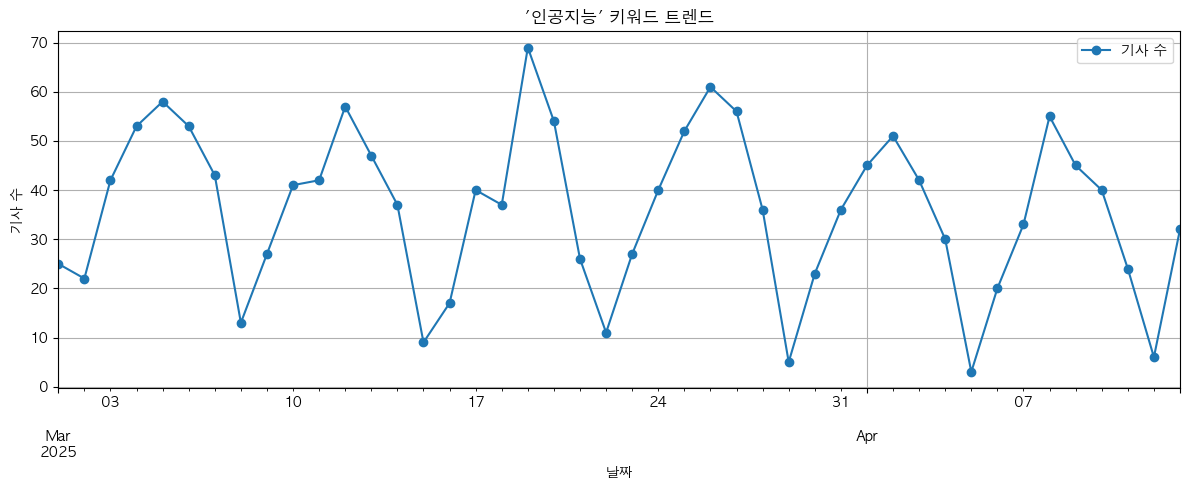

In [53]:
import requests
import os
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt

# 1. API 키 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 2. 요청 설정
url = "https://tools.kinds.or.kr/time_line"
query_keyword = "인공지능"
from_date = "2025-03-01"
until_date = "2025-04-14"
provider = ["서울경제"]
interval = "day"  # day, month, year

# 3. 요청 바디 구성
payload = {
    "access_key": API_KEY,
    "argument": {
        "query": query_keyword,
        "published_at": {
            "from": from_date,
            "until": until_date
        },
        "provider": provider,
        "category": [],
        "category_incident": [],
        "byline": "",
        "provider_subject": [],
        "interval": interval,
        "normalize": "false"
    }
}

# 4. API 호출
response = requests.post(url, json=payload)

# 5. 결과 처리
if response.status_code == 200:
    result = response.json()
    timeline = result["return_object"].get("time_line", [])

    print(f"\n✅ 키워드 트렌드 API 호출 성공! (키워드: '{query_keyword}')\n")
    
    if not timeline:
        print("📭 기간 내 데이터 없음.")
    else:
        print("📊 날짜별 키워드 언급량:\n")
        dates = []
        counts = []
        for point in timeline:
            label = point["label"]
            count = point["hits"]
            print(f"{label} → {count}건")
            dates.append(label)
            counts.append(count)

        # ⬇ 시각화 (옵션)
        df = pd.DataFrame({"날짜": dates, "기사 수": counts})
        df["날짜"] = pd.to_datetime(df["날짜"], format="%Y%m%d")
        df.set_index("날짜", inplace=True)

        df.plot(kind="line", figsize=(12, 5), marker="o", title=f"'{query_keyword}' 키워드 트렌드")
        plt.ylabel("기사 수")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

else:
    print("❌ 키워드 트렌드 API 오류:", response.status_code)
    try:
        print(response.json().get("reason", "알 수 없는 오류"))
    except:
        print(response.text)


# 7. 인기검색어 api

In [48]:
import requests
import os
from dotenv import load_dotenv

# 1. API 키 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 2. 요청 설정
url = "https://tools.kinds.or.kr/query_rank"

from_date = "2025-04-01"
until_date = "2025-04-14"
offset = 10  # 가져올 인기 키워드 수

payload = {
    "access_key": API_KEY,
    "argument": {
        "from": from_date,
        "until": until_date,
        "offset": offset
        # "target_access_key": ""  ← 특정 기관 사용자 한정할 경우만 사용
    }
}

# 3. API 호출
response = requests.post(url, json=payload)

# 4. 결과 처리
if response.status_code == 200:
    result = response.json()
    keywords = result["return_object"].get("queries", [])

    print(f"✅ 인기검색어 API 호출 성공! ({from_date} ~ {until_date})\n")

    if not keywords:
        print("📭 인기 검색어가 없습니다.")
    else:
        print("📌 인기 검색어 목록:\n")
        for i, item in enumerate(keywords, 1):
            print(f"{i}. 🔍 키워드: {item['query']} | 🔢 검색 횟수: {item['count']}")
else:
    print("❌ 인기 검색어 API 오류 발생:", response.status_code)
    try:
        print("사유:", response.json().get("reason", "알 수 없는 오류"))
    except:
        print(response.text)


✅ 인기검색어 API 호출 성공! (2025-04-01 ~ 2025-04-14)

📌 인기 검색어 목록:

1. 🔍 키워드: 개최 | 🔢 검색 횟수: 367647
2. 🔍 키워드: 지원 | 🔢 검색 횟수: 286859
3. 🔍 키워드: 사업 | 🔢 검색 횟수: 239838
4. 🔍 키워드: 출시 | 🔢 검색 횟수: 223860
5. 🔍 키워드: 운영 | 🔢 검색 횟수: 203609
6. 🔍 키워드: 공연예술통계 | 🔢 검색 횟수: 162304
7. 🔍 키워드: 공연아카이브 | 🔢 검색 횟수: 162304
8. 🔍 키워드: 공연예술통합전산망 | 🔢 검색 횟수: 162304
9. 🔍 키워드: 공연빅데이터 | 🔢 검색 횟수: 162304
10. 🔍 키워드: 공연마케팅 | 🔢 검색 횟수: 162304


# 8. 뉴스 인용문 검색 api

In [54]:
import requests
import os
from dotenv import load_dotenv

# 1. API 키 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 2. 요청 URL
url = "https://tools.kinds.or.kr/search/quotation"

# 3. 요청 조건 설정
query = "인공지능"
from_date = "2025-04-01"
until_date = "2025-04-14"
provider = ["서울경제"]

# 4. 요청 바디 구성
payload = {
    "access_key": API_KEY,
    "argument": {
        "query": query,
        "published_at": {
            "from": from_date,
            "until": until_date
        },
        "provider": provider,
        "category": [],
        "category_incident": [],
        "byline": "",
        "provider_subject": [],
        "subject_info": [],
        "sort": { "date": "desc" },
        "hilight": 200,
        "return_from": 0,
        "return_size": 10,
        "fields": [
            "quotation",
            "provider",
            "byline",
            "published_at",
            "title"
        ]
    }
}

# 5. API 호출
response = requests.post(url, json=payload)

# 6. 결과 처리
if response.status_code == 200:
    result = response.json()
    docs = result["return_object"]["documents"]
    print(f"\n✅ 뉴스 인용문 API 호출 성공! (총 {len(docs)}건)\n")

    if not docs:
        print("📭 인용문 데이터 없음")
    else:
        for i, doc in enumerate(docs, 1):
            print(f"----- {i} -----")
            print("📰 제목:", doc.get("title", "없음"))
            print("🧾 발언:", doc.get("quotation", "❌ 없음"))
            print("👤 기자:", doc.get("byline", "없음"))
            print("🗓 발행일:", doc.get("published_at", "없음"))
            print("📰 언론사:", doc.get("provider", "없음"))
            print()
else:
    print("❌ 뉴스 인용문 API 오류 발생:", response.status_code)
    try:
        print(response.json().get("reason", "알 수 없는 오류"))
    except:
        print(response.text)



✅ 뉴스 인용문 API 호출 성공! (총 10건)

----- 1 -----
📰 제목: 없음
🧾 발언: 특별하게 집중된 유형의 (품목)관세가 적용될 것
👤 기자: 없음
🗓 발행일: 2025-04-13T00:00:00.000+09:00
📰 언론사: 서울경제

----- 2 -----
📰 제목: 없음
🧾 발언: 맞다. 반도체와 의약품은 미국 내 생산을 장려하기 위한 관세 모델이 적용될 것
(전자제품은) 아마 한 달 정도 후에 적용될 반도체 관세에 포함될 것
이러한 모든 제품은 반도체 제품에 속하게 될 것
(전자제품은) 아마 한 달 정도 후에 적용될 반도체 관세에 포함될 것
두 가지 분야(반도체·의약품)는 다음 달 또는 그 다음 달에 (관세 부과 대상에) 포함될 것
👤 기자: 없음
🗓 발행일: 2025-04-13T00:00:00.000+09:00
📰 언론사: 서울경제

----- 3 -----
📰 제목: 없음
🧾 발언: 월요일(14일)에 그에 대한 답을 주겠다
👤 기자: 없음
🗓 발행일: 2025-04-13T00:00:00.000+09:00
📰 언론사: 서울경제

----- 4 -----
📰 제목: 없음
🧾 발언: 중국에 대한 관세 전쟁을 멈추지 않는 한 글로벌 수요 감소가 불가피하기 때문에 반도체·스마트폰 업계 전반의 매출 부진으로 이어질 수 있다
👤 기자: 없음
🗓 발행일: 2025-04-13T00:00:00.000+09:00
📰 언론사: 서울경제

----- 5 -----
📰 제목: 없음
🧾 발언: 14일에 구체적으로 답하겠다
당분간 최근 받은 투자가 마지막이라고 생각하라
👤 기자: 없음
🗓 발행일: 2025-04-13T00:00:00.000+09:00
📰 언론사: 서울경제

----- 6 -----
📰 제목: 없음
🧾 발언: 기술적 종속 관계가 장기적으로 국가 자율성을 약화시킬 수 있다
국가 차원의 AI 에이전트 개발을 위한 정책적 지원이 필수적
👤 기자: 없음
🗓 발행일: 2025-04-13T00:00:00.000+09:00
📰 언론사: 서울경제

---

# 9. 오늘의 키워드 api(분야별 키워드))

In [58]:
import requests
import os
from dotenv import load_dotenv

# 1. API 키 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")
url = "https://tools.kinds.or.kr/today_category_keyword"

# 2. 요청 바디 구성
payload = {
    "access_key": API_KEY,
    "argument": {}
}

# 3. API 호출
response = requests.post(url, json=payload)

# 4. 결과 처리
if response.status_code == 200:
    result = response.json()
    print("✅ 오늘의 키워드 API 호출 성공!\n")

    print("📊 분야별 기사 비중 (cate_ratio):\n")
    for item in result["return_object"].get("cate_ratio", []):
        print(f"🗂 분야: {item['category_name']}")
        print(f"   📈 비중: {item['category_percent']}%")
        print(f"   📰 기사 수: {item['category_count']}건\n")

    print("🔑 분야별 주요 키워드 (cate_keyword):\n")
    for item in result["return_object"].get("cate_keyword", []):
        print(f"📌 분야: {item['category_name']}")
        print(f"   🔍 키워드: {item['named_entity']}")
        print(f"   📊 등장 횟수: {item['named_entity_count']}")
        print(f"   🧠 타입: {item['named_entity_type']} | 단계: {item['entity_step']}")
        print("-" * 50)

else:
    print("❌ 오늘의 키워드 API 오류:", response.status_code)
    try:
        print("사유:", response.json().get("reason", "알 수 없는 오류"))
    except:
        print(response.text)


✅ 오늘의 키워드 API 호출 성공!

📊 분야별 기사 비중 (cate_ratio):

🗂 분야: 전체
   📈 비중: 100%
   📰 기사 수: 670건

🗂 분야: 정치
   📈 비중: 10.4%
   📰 기사 수: 70건

🗂 분야: 경제
   📈 비중: 14.2%
   📰 기사 수: 95건

🗂 분야: 사회
   📈 비중: 14.5%
   📰 기사 수: 97건

🗂 분야: 문화
   📈 비중: 12.7%
   📰 기사 수: 85건

🗂 분야: 국제
   📈 비중: 11.6%
   📰 기사 수: 78건

🗂 분야: 지역
   📈 비중: 11.2%
   📰 기사 수: 75건

🗂 분야: 스포츠
   📈 비중: 10.1%
   📰 기사 수: 68건

🗂 분야: IT_과학
   📈 비중: 15.2%
   📰 기사 수: 102건

🔑 분야별 주요 키워드 (cate_keyword):

📌 분야: 전체
   🔍 키워드: 민주당
   📊 등장 횟수: 536
   🧠 타입: OG | 단계: step4
--------------------------------------------------
📌 분야: 전체
   🔍 키워드: 미국
   📊 등장 횟수: 457
   🧠 타입: LC | 단계: step4
--------------------------------------------------
📌 분야: 전체
   🔍 키워드: 경기
   📊 등장 횟수: 455
   🧠 타입: LC | 단계: step4
--------------------------------------------------
📌 분야: 전체
   🔍 키워드: 자원
   📊 등장 횟수: 327
   🧠 타입: OG | 단계: step4
--------------------------------------------------
📌 분야: 전체
   🔍 키워드: 충남
   📊 등장 횟수: 261
   🧠 타입: LC | 단계: step4
-----------------------------------------

# 10. 특성 추출 api

In [67]:
import requests
import os
from dotenv import load_dotenv

# 1. 환경 변수 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 2. 요청 URL
url = "https://tools.kinds.or.kr/feature"

# 3. 분석할 기사 텍스트 입력
payload = {
    "access_key": API_KEY,
    "argument": {
        "title": "AI 채용 시대… 서울시, 비대면 면접 체험 확대",
        "sub_title": "AI 면접 역량 검사 프로그램, 청년 구직자 대상 운영",
        "content": """
        서울시는 청년들이 급변하는 취업 트렌드에 발맞춰 비대면 AI 채용에 대비할 수 있도록
        AI 면접 체험과 역량 검사 프로그램을 제공한다.
        이 프로그램은 지난해 1만 5506명의 청년 구직자가 이용했으며 95.8%의 만족도를 보였다.
        """
    }
}

# 4. API 호출
response = requests.post(url, json=payload)

# 5. 결과 처리
if response.status_code == 200:
    result = response.json()
    print("✅ 특성 추출 API 호출 성공!\n")

    for field in ["title", "sub_title", "content"]:
        print(f"📌 {field.upper()} 키워드:")
        text = result["return_object"]["result"].get(field, "")
        
        if not text.strip():
            print(" - (데이터 없음)")
            continue
        
        for item in text.strip().split(" "):  # 공백으로 나눔
            if "|" in item:
                keyword, score = item.split("|")
                print(f" - 🔑 {keyword} (점수: {score})")
            else:
                print(f" - 🔑 {item} (점수 없음)")
        print()

else:
    print("❌ 특성 추출 API 오류:", response.status_code)
    try:
        print(response.json().get("reason", "알 수 없는 오류"))
    except:
        print(response.text)


✅ 특성 추출 API 호출 성공!

📌 TITLE 키워드:
 - 🔑 비대면 (점수: 0.13796401859895588)
 - 🔑 비대면_면접_체험_확대 (점수: 0.1122394846785009)
 - 🔑 비대면_면접 (점수: 0.1107085743755595)
 - 🔑 서울시 (점수: 0.10651785867763924)
 - 🔑 체험_확대 (점수: 0.09864334565614173)
 - 🔑 AI_채용_시대 (점수: 0.09800636937840729)
 - 🔑 AI_채용 (점수: 0.09271911827034766)
 - 🔑 AI (점수: 0.07846417387877458)
 - 🔑 채용 (점수: 0.0014145957856628558)
 - 🔑 시대 (점수: 0.0011054769720295822)
 - 🔑 체험 (점수: 0.0010777483865251438)
 - 🔑 확대 (점수: 0.001070060506441623)
 - 🔑 면접 (점수: 0.001069983064895179)

📌 SUB_TITLE 키워드:
 - 🔑 청년_구직자_대상_운영 (점수: 0.10068949813023778)
 - 🔑 역량_검사 (점수: 0.10011496461196061)
 - 🔑 청년_구직자 (점수: 0.09917197466307658)
 - 🔑 구직자 (점수: 0.09605917594158779)
 - 🔑 대상_운영 (점수: 0.08860724356059647)
 - 🔑 AI_면접 (점수: 0.07590898815867458)
 - 🔑 AI (점수: 0.07039955835632354)
 - 🔑 검사 (점수: 0.0012411734209193646)
 - 🔑 청년 (점수: 0.001232385078828527)
 - 🔑 면접 (점수: 0.0010003022000747816)
 - 🔑 프로그램 (점수: 9.872904376385088E-4)
 - 🔑 역량 (점수: 9.71513240470275E-4)
 - 🔑 대상 (점수: 9.686366219366614E-4

# 11. 키워드 추출 api

In [70]:
import requests
import os
from dotenv import load_dotenv

# 1. 환경 변수 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 2. API URL
url = "https://tools.kinds.or.kr/keyword"

# 3. 본문 입력
payload = {
    "access_key": API_KEY,
    "argument": {
        "title": "AI 채용 시대… 서울시, 비대면 면접 체험 확대",
        "sub_title": "AI 면접 역량 검사 프로그램, 청년 구직자 대상 운영",
        "content": """
        서울시는 청년들이 급변하는 취업 트렌드에 발맞춰 비대면 AI 채용에 대비할 수 있도록
        AI 면접 체험과 역량 검사 프로그램을 제공한다.
        """
    }
}

# 4. API 호출
response = requests.post(url, json=payload)

# 5. 결과 출력
if response.status_code == 200:
    result = response.json()
    print("✅ 키워드 추출 API 호출 성공!\n")

    for field in ["title", "sub_title", "content"]:
        keywords = result["return_object"]["result"].get(field, "")
        print(f"📌 {field.upper()} 키워드:")
        for word in keywords.strip().split(" "):
            if word:
                print(f" - 🔑 {word}")
        print()
else:
    print("❌ 키워드 추출 API 오류:", response.status_code)
    try:
        print(response.json().get("reason", "알 수 없는 오류"))
    except:
        print(response.text)


✅ 키워드 추출 API 호출 성공!

📌 TITLE 키워드:
 - 🔑 ai
 - 🔑 채용
 - 🔑 시대
 - 🔑 서울시
 - 🔑 비대면
 - 🔑 면접
 - 🔑 체험
 - 🔑 확대

📌 SUB_TITLE 키워드:
 - 🔑 ai
 - 🔑 면접
 - 🔑 역량
 - 🔑 검사
 - 🔑 프로그램
 - 🔑 청년
 - 🔑 구직자
 - 🔑 대상
 - 🔑 운영

📌 CONTENT 키워드:
 - 🔑 서울시
 - 🔑 청년들
 - 🔑 급변
 - 🔑 취업
 - 🔑 트렌드
 - 🔑 비대면
 - 🔑 ai
 - 🔑 채용
 - 🔑 대비
 - 🔑 ai
 - 🔑 면접
 - 🔑 체험
 - 🔑 역량
 - 🔑 검사
 - 🔑 프로그램
 - 🔑 제공



# 12. topn 키워드 api

In [ ]:
import requests
import os
from dotenv import load_dotenv

# API 키 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

url = "https://tools.kinds.or.kr/topn_keyword"

payload = {
    "access_key": API_KEY,
    "argument": {
        "published_at": {
            "from": "2025-04-01",
            "until": "2025-04-14"
        },
        "query": "인공지능 OR AI"
    }
}

response = requests.post(url, json=payload)

if response.status_code == 200:
    result = response.json()
    
    if result.get("result") == 0:
        keywords = result["return_object"]["result"]
        print("✅ TopN 키워드 API 호출 성공!\n")
        if not keywords:
            print("📭 추출된 키워드가 없습니다.")
        else:
            for item in keywords:
                print(f"{item['rank']}. 🔑 {item['name']}")
    else:
        print("⚠️ API 내부 실패")
        print("사유:", result.get("reason", "알 수 없는 오류"))
else:
    print("❌ API 통신 오류:", response.status_code)
    try:
        print(response.json().get("reason", "알 수 없는 오류"))
    except:
        print(response.text)


✅ TopN 키워드 API 호출 성공!

1. 🔑 반도체
2. 🔑 미국
3. 🔑 LG
4. 🔑 광주
5. 🔑 경쟁력
6. 🔑 한국
7. 🔑 클라우드
8. 🔑 중국
9. 🔑 생성형 AI
10. 🔑 삼성전자
11. 🔑 SK
12. 🔑 AX
13. 🔑 스타트업
14. 🔑 구글
15. 🔑 전문가
16. 🔑 실시간
17. 🔑 광주시
18. 🔑 고도화
19. 🔑 일본
20. 🔑 AI 모델
21. 🔑 서울
22. 🔑 KT
23. 🔑 엔비디아
24. 🔑 이용자
25. 🔑 LLM
26. 🔑 SKT
27. 🔑 GPU
28. 🔑 사용자
29. 🔑 연구원
30. 🔑 KAIST
31. 🔑 제조업
32. 🔑 UNIST
33. 🔑 기업들
34. 🔑 차세대
35. 🔑 네이버
36. 🔑 TV
37. 🔑 대한민국
38. 🔑 모빌리티
39. 🔑 포항
40. 🔑 보고서
41. 🔑 챗GPT
42. 🔑 대변인
43. 🔑 AI 서비스
44. 🔑 업무협약
45. 🔑 거버넌스
46. 🔑 SK텔레콤
47. 🔑 가속화
48. 🔑 AI 시대
49. 🔑 LG전자
50. 🔑 최적화
51. 🔑 AI 활용
52. 🔑 디지털 전환
53. 🔑 이슬림코리아
54. 🔑 챗봇
55. 🔑 퓨리오사에이아이
56. 🔑 휴머노이드
57. 🔑 공무원
58. 🔑 지브리
59. 🔑 빅테크
60. 🔑 카카오모빌리티
61. 🔑 연구소
62. 🔑 자동화
63. 🔑 MOU
64. 🔑 R&D
65. 🔑 소비자
66. 🔑 국가 AI
67. 🔑 일자리
68. 🔑 AI 대변인
69. 🔑 오픈AI
70. 🔑 포항시
71. 🔑 에이닷
72. 🔑 뤼튼
73. 🔑 SW
74. 🔑 과학기술정보통신부
75. 🔑 CEO
76. 🔑 정통부
77. 🔑 퓨리오사
78. 🔑 위원회
79. 🔑 네트워크
80. 🔑 생태계
81. 🔑 충남
82. 🔑 활성화
83. 🔑 딥시크
84. 🔑 보이스피싱
85. 🔑 본부장
86. 🔑 유플러스
87. 🔑 팹리스
88. 🔑 드론
89. 🔑 AI 산업
90. 🔑 생성형 인공지능
91. 🔑 딥테크
92. 🔑 자율주행
93. 🔑 GPT
94. 